# Exercise 3: Gaussian integral

>Using Monte Carlo integration, check that
>
>$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$
>
>- Does the result converge with the number of samples? And how does the error go down?
>- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate!)
>- How does the distribution change if $N$ increases?
>
>(Hint: think about sample mean and sample variance)

$$ \int_0^{+\infty} \frac{1}{\sigma}\sqrt{\frac{2}{\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) dx = 1\ $$

The integrand shall be our distribution $p(x)$, and then we can estimate the integral value using $\int f(x) p(x) dx \approx \frac{1}{N}\sum_{i=1}^N f(x_i) $

The int_dist then becomes:

$$  \sigma \sqrt{\frac{\pi}{2}} \int_0^\infty x^3 p(x) dx   \approx \frac{\sigma}{N}\sqrt{\frac{\pi}{2}}\sum_{i=1}^N (x_i)^3 $$

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from tqdm import tqdm

158.2119834329678 162


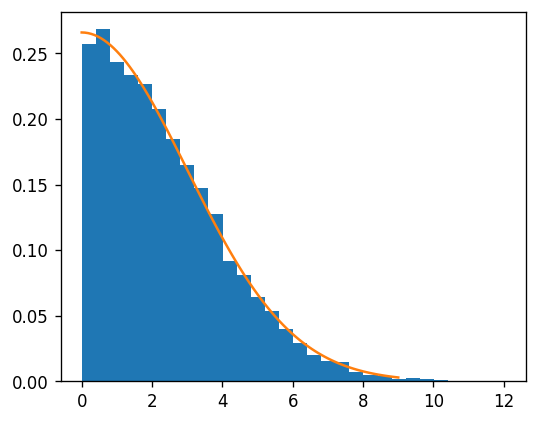

In [23]:
np.random.seed(404)
N = 10000 #number of points

sigma = 3
dist = stats.norm(loc=0, scale=sigma)

res = 2*sigma**4 # Analytical result

x = np.abs(dist.rvs(N))
int_dist = sigma/N * np.sqrt(np.pi/2) * np.sum(x**3)
print(int_dist, res)

plt.hist(x,density=True,bins=30);
plt.plot(np.linspace(0,3*sigma,100), 2*dist.pdf(np.linspace(0,3*sigma,100)))

The result is similiar, we can study its dependenies on N.

## Convergence and error

In [31]:
np.random.seed(404)
integral = []

N_max = 100000
step = 100

Nvals=np.unique(np.logspace(1,6,100,dtype=int))

#for N  in range(100, N_max, step):
for N in tqdm(Nvals):
    dist = stats.norm(loc=0, scale=sigma)
    x = np.abs(dist.rvs(N))
    integral.append(sigma/N * np.sqrt(np.pi/2) * np.sum(x**3))

100%|██████████| 100/100 [00:00<00:00, 248.44it/s]


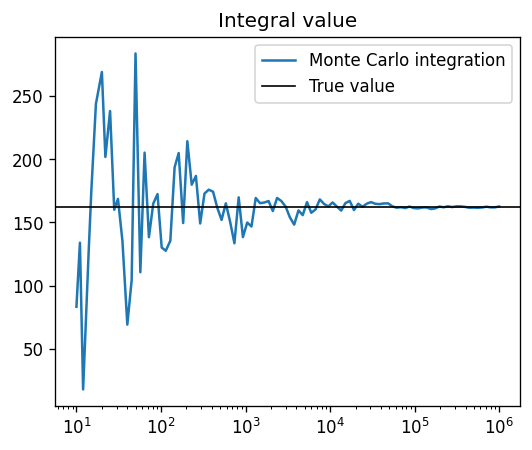

In [38]:

#-------  Mpl params  ----------------
%matplotlib inline
mpl.rc('figure', figsize=(5,4), dpi=120)
plt.rcParams.update({'font.size': 10})
#--------------------------------------------

fig, ax = plt.subplots()
ax.plot(Nvals, integral, label='Monte Carlo integration')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('Integral value')
ax.axhline(res, color='k',lw=1, ls='-', label = 'True value' )
ax.legend()

The integral converges to the correct value. Let's try to describe the dependency on N of the dispersion computed as relative error for each integral value:

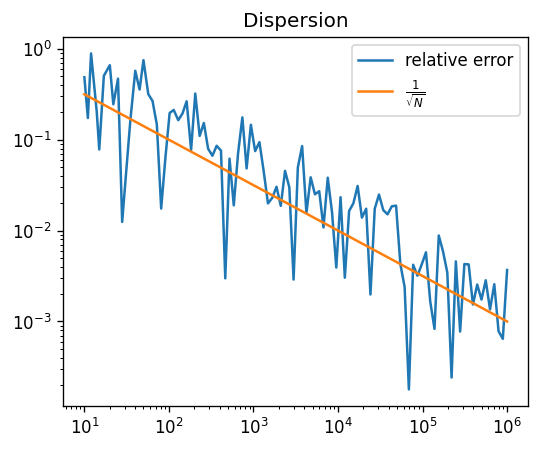

In [41]:
int_arr = np.array(integral)
disp = np.sqrt((int_arr - res)**2)
disp = np.abs(int_arr-res)/res

#-------  Mpl params  ----------------
%matplotlib inline
mpl.rc('figure', figsize=(5,4), dpi=120)
plt.rcParams.update({'font.size': 10})
#--------------------------------------------

fig, ax = plt.subplots()
ax.plot(Nvals, disp, label='relative error')
ax.plot(Nvals, 1/np.sqrt(Nvals), label=r'$\frac{1}{\sqrt{N}}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Dispersion')
ax.legend()

We see that the error goes as $\frac{1}{\sqrt{N}}$

# Distribution dependency on N

Let's study the distribution of the result for different runs with a given N.

In [37]:
np.random.seed(404)

distrib_list = []

N_max = 30000
step = 500
n_runs = 5000
sigma = 3
counts = [0,0,0,0]
bins = [0,0,0,0]
skew=[]
std_dev=[]

for i,N  in enumerate((10, 100, 1000, 10000)):
    m = N*2
    int_dist = []

    for j in range(n_runs):
        dist = stats.norm(loc=0, scale=sigma)
        x = dist.rvs(m)
        x = x[x>0]
        int_dist.append(sigma/N * np.sqrt(np.pi/2) * np.sum(x**3))

    distrib_list.append(int_dist)
    std_dev.append(np.std(int_dist))
    skew.append(stats.skew(int_dist))

N=10, skeweness = 1.676012815807367
N=100, skeweness = 0.5251996798599071
N=1000, skeweness = 0.20063943308473894
N=10000, skeweness = 0.09099796987204825


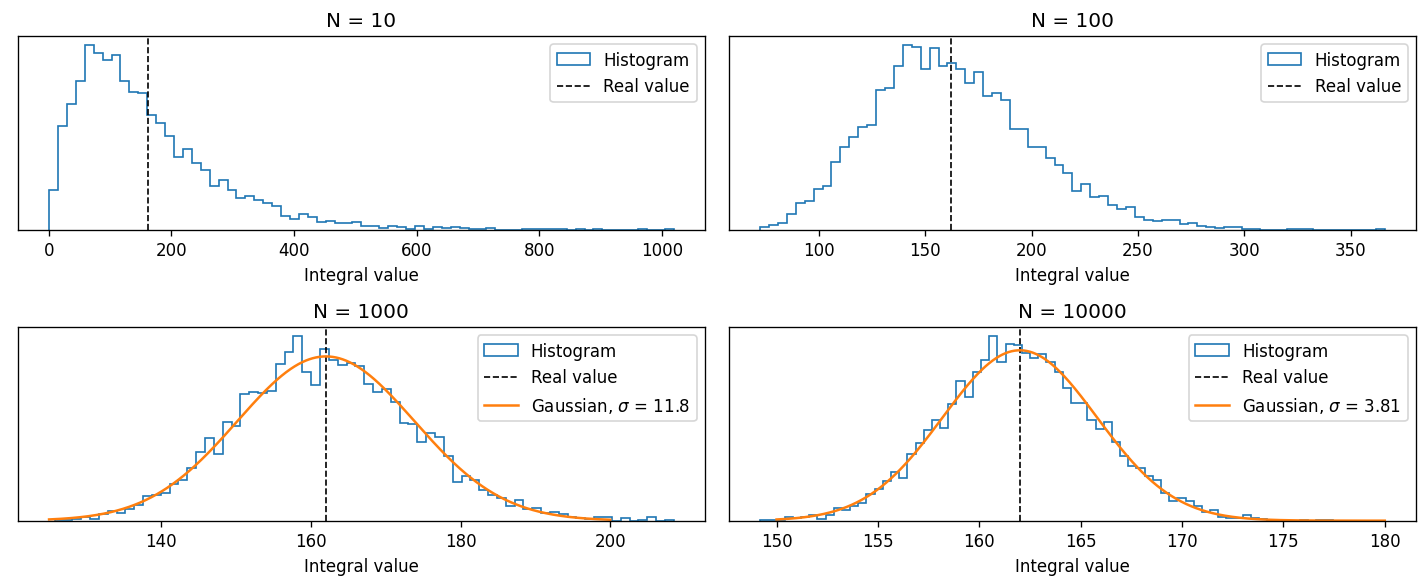

In [40]:
#-------  Mpl params  ---------------
%matplotlib inline
mpl.rc('figure', figsize=(12, 5), dpi=120)
plt.rcParams.update({'font.size': 10})
#--------------------------------------------

xgrid = []

sig = disp[900] #computed dispersion for N = 1000

gaus = stats.norm(loc=res, scale=3.8)
gaus1 = stats.norm(loc=res, scale=11)
gaus2 = stats.norm(loc=res, scale=std_dev[2])
gaus3 = stats.norm(loc=res, scale=std_dev[3])

fig, ax = plt.subplots(2,2)
ax = ax.flatten()

for i,N in enumerate([10, 100, 1000, 10000]): 
    counts[i], bins[i], patches = ax[i].hist(distrib_list[i],density=True,bins=70, \
        histtype='step',lw=1,label='Histogram')
    ax[i].set_title(f'N = {N}')
    ax[i].set_xlabel('Integral value')
    ax[i].axvline(res, color='k', lw=1, ls='--', label='Real value')
    ax[i].get_yaxis().set_visible(False)

pois_grid = np.array(range(1,1000))
xgrid = np.linspace(150,180,1000)
xgrid1 = np.linspace(125,200,1000)
xgrid2 = np.linspace(0,800,1000)

#ax[2].plot(xgrid1, gaus1.pdf(xgrid1), label=f'Fit by eye, $\sigma$ = 11')
ax[2].plot(xgrid1, gaus2.pdf(xgrid1), label=f'Gaussian, $\sigma$ = {std_dev[2]:.3}')

#ax[3].plot(xgrid, gaus.pdf(xgrid),  label=f'Fit by eye, $\sigma$ = 3.8')
ax[3].plot(xgrid, gaus3.pdf(xgrid), label=f'Gaussian, $\sigma$ = {std_dev[3]:.3}')

for i in range(4):
    ax[i].legend()


fig.tight_layout()

print(f'N=10, skeweness = {skew[0]}')
print(f'N=100, skeweness = {skew[1]}')
print(f'N=1000, skeweness = {skew[2]}')
print(f'N=10000, skeweness = {skew[3]}')


- With higher values of N (1000 and 10000 shown) the distribution is Gaussian as can be clearly inferred overlapping the distribution and the histogram. In the image I show the difference between the eye-fitted Gaussian, and the one built with using the computed standard deviation.
- For smaller N values the distribution changes in shape to positive skeweness